/Users/cjschan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


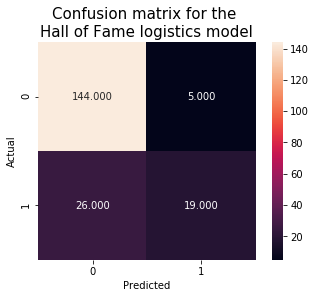

In [1]:
# imports the necessary libraries
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier 

# loads the HOF data
hof = pd.read_csv("https://s3-us-west-2.amazonaws.com/static-resources.zybooks.com/hof.csv")

# splits the data into training and test sets
train, test = train_test_split(hof,test_size=0.25, random_state=0)

# builds the logistic model
logisticRegr = LogisticRegression()
logisticRegr.fit(train[["Hits"]], train[["HOF"]])

# runs the model on the test set
predictions = logisticRegr.predict(test[["Hits"]])

# generates confusion matrix
conf = metrics.confusion_matrix(test[["HOF"]], predictions)

# generates a confusion matrix using heatmaps
sns.heatmap(conf, annot=True, fmt=".3f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('Confusion matrix for the \nHall of Fame logistics model', fontsize = 15);
plt.savefig("logistics.png")